In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [7]:
res = np.load("combined_cv_results.npy", allow_pickle=True).item()

## 5 x 5 frame 
    * correlation plots for random test rmse from each split

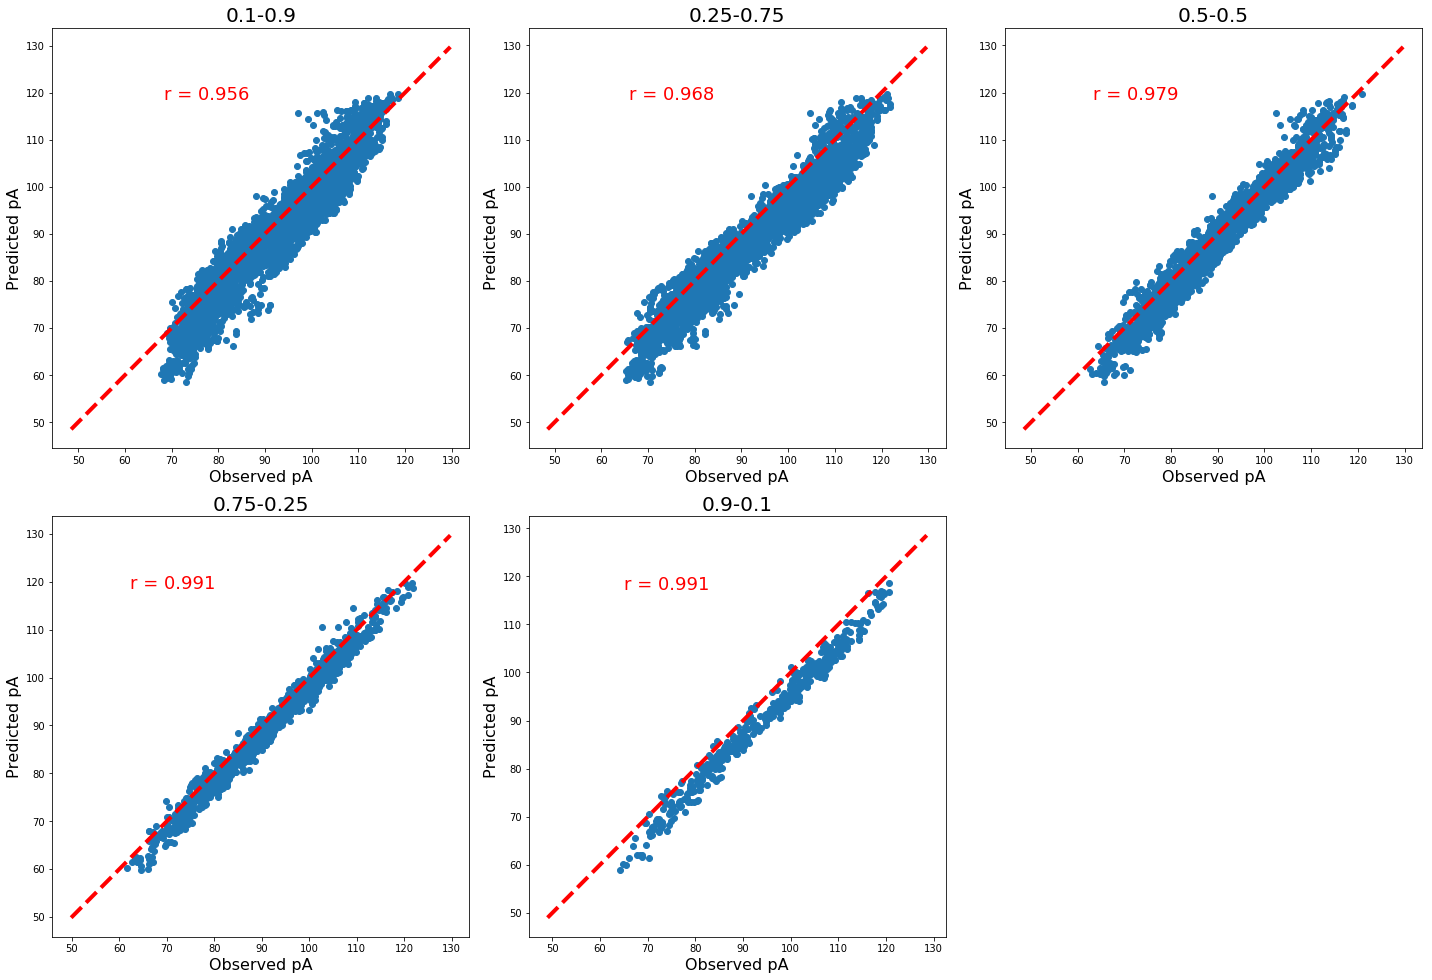

In [8]:
fig = plt.figure(figsize=(20,20))

for i, split in enumerate(res.keys()):
    plot_id = int('33%d'%(i+1))
    ax = fig.add_subplot(plot_id)
    
    idx = np.arange(len(res[split]['test_labels']))
    random_idx = np.random.choice(idx)
    
    real = res[split]['test_labels'][random_idx]
    pred = res[split]['test_pred'][random_idx]
    
    r, _ = pearsonr(real, pred)
    
    ax.text(1.01*min(pred),0.99*max(real),"r = %.3f"%(r), fontsize=18, color='red')
    
    ax.plot([min(real)-10, max(real)+10], [min(real)-10, max(real)+10], 'r--', lw=4)
#     ax.set_xlim(min(pred)-10,max(pred)+5)
#     ax.set_ylim(min(pred)-10,max(pred)+5)

    ax.scatter(pred, real)
    ax.set_title(split, fontsize=20)
    ax.set_xlabel("Observed pA", fontsize=16)
    ax.set_ylabel("Predicted pA", fontsize=16)
    plt.tight_layout()

plt.savefig("../plots/Combined_50-foldCV_corr_plots.png", dpi=600)

    